In [2]:
#Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
#Load Data
df = pd.read_csv('C:\\Users\\Joseans-M17\\Documents\\VScode VENV\\data_jobs.csv')
#Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

In [3]:
df_US = df[df['job_country']=='United States'].copy()
#df_US['job_posted_month_index'] = df_US['job_posted_date'].dt.month
df_US['job_posted_month'] = df_US['job_posted_date'].dt.strftime('%B')
df_US


,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_posted_month
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,NaN,NaN,NaN,Boehringer Ingelheim,NaN,NaN,June
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,NaN,NaN,NaN,Southwest Research Institute,"['python', 'c++', 'java', 'matlab', 'aws', 'te...","{'cloud': ['aws'], 'libraries': ['tensorflow',...",July
5,Data Engineer,GCP Data Engineer,Anywhere,via ZipRecruiter,Contractor and Temp work,True,Georgia,2023-11-07 14:01:59,False,False,United States,NaN,NaN,NaN,smart folks inc,"['python', 'sql', 'gcp']","{'cloud': ['gcp'], 'programming': ['python', '...",November
6,Senior Data Engineer,Senior Data Engineer - GCP Cloud,"Dearborn, MI",via LinkedIn,Full-time,False,"Florida, United States",2023-03-27 13:18:18,False,False,United States,NaN,NaN,NaN,"Miracle Software Systems, Inc","['sql', 'python', 'java', 'sql server', 'gcp',...","{'cloud': ['gcp', 'bigquery'], 'databases': ['...",March
9,Data Scientist,Data Scientist II,Anywhere,via ZipRecruiter,Full-time,True,"New York, United States",2023-04-23 13:02:57,False,False,United States,NaN,NaN,NaN,"Radwell International, LLC","['sql', 'python', 'r', 'mongodb', 'mongodb', '...","{'analyst_tools': ['excel'], 'cloud': ['azure'...",April
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785673,Data Scientist,Asset Management Data Scientist,"New York, NY",via Trabajo.org,Full-time,False,"New York, United States",2023-10-16 06:01:53,True,False,United States,NaN,NaN,NaN,JPMorgan Chase & Co.,NaN,NaN,October
785685,Data Analyst,Data Analyst,"Indianapolis, IN",via Trabajo.org,Full-time,False,"Illinois, United States",2023-07-16 06:01:27,True,False,United States,NaN,NaN,NaN,"Aara Technologies, Inc","['sql', 'excel']","{'analyst_tools': ['excel'], 'programming': ['...",July
785692,Data Scientist,Data Scientist- Hybrid Work Location,"Dayton, OH",via Ai-Jobs.net,Full-time,False,"Illinois, United States",2023-04-21 06:02:31,False,True,United States,year,157500.0,NaN,Tenet3,"['python', 'matlab', 'r']","{'programming': ['python', 'matlab', 'r']}",April
785703,Data Analyst,Data Analyst - CRYPTOGRAPHY - Full-time,Anywhere,via Snagajob,Full-time,True,"Texas, United States",2023-01-28 06:02:55,True,False,United States,NaN,NaN,NaN,Axelon Services Corporation,NaN,NaN,January


In [4]:
df_US_pivot = df_US.pivot_table(index='job_posted_month', columns='job_title_short', aggfunc='size')

In [5]:
df_US_pivot.reset_index(inplace=True)
df_US_pivot['month_no'] = pd.to_datetime(df_US_pivot['job_posted_month'], format='%B').dt.month
df_US_pivot.sort_values('month_no', inplace=True)
df_US_pivot.set_index('job_posted_month', inplace=True)
df_US_pivot.drop(columns='month_no', inplace=True)

In [6]:
top_3 = df_US['job_title_short'].value_counts().head(3)
top_3 = top_3.index.tolist()

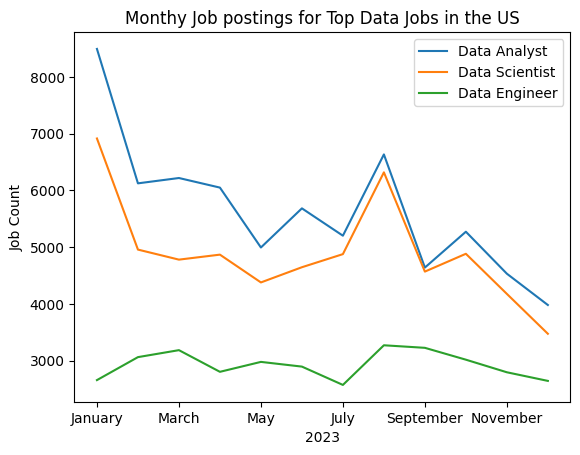

In [7]:
df_US_pivot[top_3].plot(kind='line')
plt.title('Monthy Job postings for Top Data Jobs in the US')
plt.xlabel('2023')
plt.ylabel('Job Count')
plt.legend()
plt.show()

# combined with -Merge Dataframes lesson

In [8]:
software_jobs = pd.read_csv("https://lukeb.co/software_csv", index_col='job_posted_month')

software_jobs

,Front-End Developer,Back-End Developer,Full-Stack Developer,UI/UX Designer
job_posted_month,,,,
January,13619,9827,5108,4348
February,11456,9116,7298,4284
March,11102,8178,5814,4159
April,14037,9209,7232,4220
May,12126,8864,6718,4980
June,12003,8065,5902,4781
July,11914,8061,6839,4344
August,11571,8191,7413,4104
September,14016,8447,6139,4094


In [9]:
df_US_merged = df_US_pivot.merge(software_jobs, on="job_posted_month")

In [10]:
top_5 = df_US_merged.sum().sort_values(ascending=False).head().index.to_list()

top_5

['Front-End Developer',
 'Back-End Developer',
 'Full-Stack Developer',
 'Data Analyst',
 'Data Scientist']

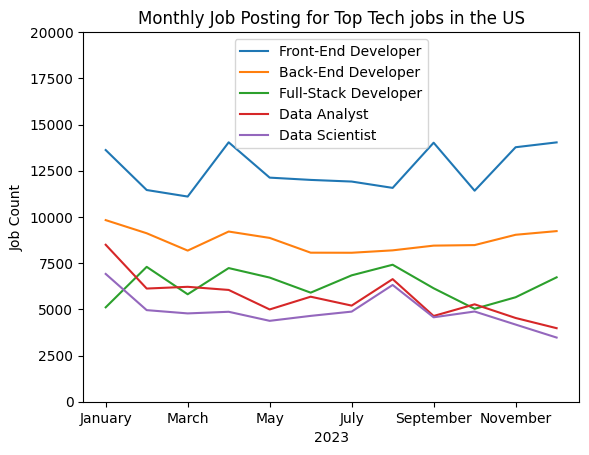

In [11]:
df_US_merged[top_5].plot(kind='line')
plt.title('Monthly Job Posting for Top Tech jobs in the US')
plt.xlabel('2023')
plt.ylabel('Job Count')
plt.ylim(0,20000)
plt.legend()
plt.show()

# Problems

In [56]:
# Merge US Jobs and Monthly Postings

df_test = df[df['job_country'] == 'United States'].copy()
#df_test.groupby('job_title_short')['job_country'].value_counts()
df_test['month_posted'] = df_test['job_posted_date'].dt.strftime('%B')
us_jobs = df_test.pivot_table(index='job_title_short', values='job_country', aggfunc='count')
monthly_postings = df_test.pivot_table(index='job_title_short', columns='month_posted', aggfunc='count', values='job_country')
pd.merge(us_jobs, monthly_postings, on='job_title_short')

,job_country,April,August,December,February,January,July,June,March,May,November,October,September
job_title_short,,,,,,,,,,,,,
Business Analyst,7382,565,903,648,447,527,581,446,438,279,719,932,897
Cloud Engineer,423,40,39,40,24,36,39,32,19,20,36,48,50
Data Analyst,67816,6049,6634,3979,6124,8494,5201,5683,6218,4993,4531,5271,4639
Data Engineer,35080,2801,3269,2641,3060,2655,2570,2893,3183,2976,2793,3015,3224
Data Scientist,58830,4867,6318,3472,4956,6915,4876,4645,4779,4377,4175,4882,4568
Machine Learning Engineer,921,51,68,119,56,60,65,48,59,49,132,101,113
Senior Data Analyst,11791,1025,1186,601,1258,1544,883,1009,1114,839,656,871,805
Senior Data Engineer,9289,781,903,689,878,773,747,812,829,746,684,672,775
Senior Data Scientist,12946,991,1515,752,1127,1552,1095,1033,1150,914,816,987,1014


In [ ]:
# Merge Non-Remote Jobs and Salary

non_remote = df_test[df['job_work_from_home'] == True].pivot_table(index='job_title_short', values='job_work_from_home', aggfunc='count')
job_salary = df.pivot_table(index='job_title_short', values='salary_year_avg', aggfunc='median')
pd.merge(non_remote,job_salary, on='job_title_short')

C:\Users\Joseans-M17\AppData\Local\Temp\ipykernel_16728\1371976728.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  non_remote = df_test[df['job_work_from_home'] == True].pivot_table(index='job_title_short', values='job_work_from_home', aggfunc='count')


,job_work_from_home,salary_year_avg
job_title_short,,
Business Analyst,611,85000.0
Cloud Engineer,55,90000.0
Data Analyst,5106,90000.0
Data Engineer,6285,125000.0
Data Scientist,6126,127500.0
Machine Learning Engineer,117,106415.0
Senior Data Analyst,1064,111175.0
Senior Data Engineer,1876,147500.0
Senior Data Scientist,1600,155500.0


Combined with Concat Lesson

In [ ]:
# Concat combines dataframes with the same columns by adding rows from one set to another
df = pd.read_csv('C:\\Users\\Joseans-M17\\Documents\\VScode VENV\\data_jobs.csv')
#Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

In [4]:
df['job_posted_month'] = df['job_posted_date'].dt.strftime('%b')

months = df['job_posted_month'].unique()

dict_months = {month: df[df['job_posted_month'] == month] for month in months}

<Axes: xlabel='job_posted_month'>

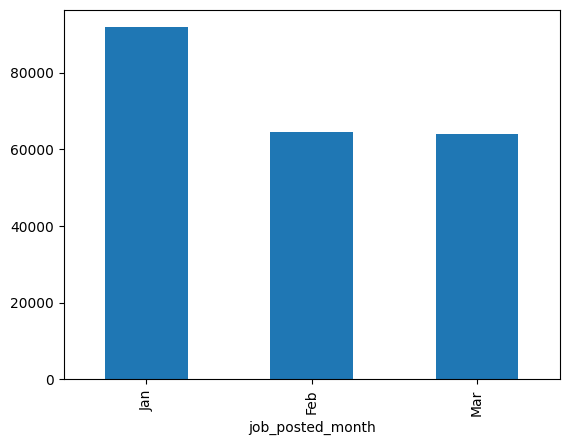

In [5]:
df_q1 = pd.concat([dict_months['Jan'], dict_months['Feb'], dict_months['Mar']], ignore_index=True)
df_q1['job_posted_month'].value_counts().plot(kind='bar')